# HYDROPOWER PREDICTION

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [17]:
# WEIGHT INITIALIZATION

def initialize_weights(input_size, hidden_size):
    input_weights = np.random.rand(input_size, hidden_size)
    biases = np.random.rand(hidden_size)
    return input_weights, biases

def compute_output_weights(input_weights, biases, input_data, output_data):
    hidden_layer_output = np.dot(input_data, input_weights) + biases
    output_weights = np.dot(np.linalg.pinv(hidden_layer_output), output_data)
    return output_weights

In [18]:
# TRAINING THE ELM MODEL

def train_elm_model(train_data_file, hidden_size=10):
    train_data = pd.read_csv(train_data_file)

    X_train = train_data[['Year', 'month', 'Rainfall']]  # Selecting input features
    y_train = train_data['kwh']  # Target variable
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    input_weights, biases = initialize_weights(X_train_scaled.shape[1], hidden_size)
    output_weights = compute_output_weights(input_weights, biases, X_train_scaled, y_train)

    return scaler, input_weights, biases, output_weights

In [19]:
# TESTING THE MODEL
def test_elm_model(test_data_file, scaler, input_weights, biases, output_weights):
    
    test_data = pd.read_csv(test_data_file)

    X_test = test_data[['Year', 'month', 'Rainfall']]
    X_test_scaled = scaler.transform(X_test)
    predicted_generation = np.dot(X_test_scaled, input_weights) + biases
    predicted_generation = np.dot(predicted_generation, output_weights)
    # Replace negative values with 0
    predicted_generation = np.where(predicted_generation < 0, 0, predicted_generation)

    # Get the actual generation values for the testing data
    actual_generation = test_data['kwh']

    mse = mean_squared_error(actual_generation, predicted_generation)
    months = test_data['month']
    predicted_df = pd.DataFrame({'Month': months, 'Rainfall': test_data['Rainfall'], 
                                 'Predicted Generation (kWh)': predicted_generation,
                                 'Actual Generation (kWh)': actual_generation})

    return predicted_df, mse

In [20]:
# Train the model
scaler, input_weights, biases, output_weights = train_elm_model("rain1.csv")

# Test the trained model with the testing data
predicted_df, mse = test_elm_model("rain.csv", scaler, input_weights, biases, output_weights)

print("Predicted kWh generation for each month:")
print(predicted_df)
print("Mean Squared Error (MSE) for the testing data:", mse)


Predicted kWh generation for each month:
    Month  Rainfall  Predicted Generation (kWh)  Actual Generation (kWh)
0       1       213                 7652.269560                   6780.0
1       2        31                    0.000000                      0.0
2       3        45                    0.000000                      0.0
3       4        93                 1697.124483                      0.0
4       5       113                 2625.791285                   1410.0
5       6       310                12149.917811                  10650.0
6       7       395                16235.109370                  18240.0
7       8       581                25225.054783                  22410.0
8       9       427                17703.947618                  19230.0
9      10       453                18923.985936                  20400.0
10     11       382                15433.518077                  17400.0
11     12       275                10194.821122                   7620.0
Mean Squar

## for checking if the accuracy increases or not we removed the values of 2023 and trained the model with the data upto 2021 and tested the model with data of 2022

In [21]:
# Train the model
scaler, input_weights, biases, output_weights = train_elm_model("rain2021.csv")

# Test the trained model with the testing data
predicted_df, mse = test_elm_model("rain2022.csv", scaler, input_weights, biases, output_weights)

print("Predicted kWh generation for each month:")
print(predicted_df)
print("Mean Squared Error (MSE) for the testing data:", mse)


Predicted kWh generation for each month:
    Month  Rainfall  Predicted Generation (kWh)  Actual Generation (kWh)
0       1       191                 7845.369051                   5760.0
1       2        35                  456.792640                      0.0
2       3        40                  662.245477                      0.0
3       4       164                 6480.676454                   3108.0
4       5       167                 6591.793524                   3168.0
5       6       342                14815.786561                  12828.0
6       7       188                 7521.545917                   5403.0
7       8       301                12821.130175                   9489.1
8       9       355                15337.809305                  14934.0
9      10       345                14835.743889                  13284.0
10     11       306                12965.809851                  10662.0
11     12       359                15435.321098                  15870.0
Mean Squar

## from this we get 4641892 for data upto 2021 and if we add the data of 2022 the mse error decreases to 2859776

In [22]:
# prediction

def predict_kwh(scaler, input_weights, biases, output_weights, year, month, rainfall):
    user_input = pd.DataFrame({'Year': [year], 'month': [month], 'Rainfall': [rainfall]})

    user_input_scaled = scaler.transform(user_input)

    predicted_generation = np.dot(user_input_scaled, input_weights) + biases
    predicted_generation = np.dot(predicted_generation, output_weights)

    predicted_generation = np.where(predicted_generation < 0, 0, predicted_generation)

    return predicted_generation[0]

In [37]:
scaler, input_weights, biases, output_weights = train_elm_model("rain1.csv")

predicted_df, mse = test_elm_model("rain.csv", scaler, input_weights, biases, output_weights)

print("Predicted kWh generation for each month:")
print(predicted_df)

print("Mean Squared Error (MSE) for the testing data:", mse)

year = int(input("Enter the year: "))
month = input("Enter the month: ")
rainfall = float(input("Enter the rainfall (mm): "))

predicted_kwh = predict_kwh(scaler, input_weights, biases, output_weights, year, month, rainfall)
print("Predicted kWh generation:", predicted_kwh)

Predicted kWh generation for each month:
    Month  Rainfall  Predicted Generation (kWh)  Actual Generation (kWh)
0       1       213                 7652.269560                   6780.0
1       2        31                    0.000000                      0.0
2       3        45                    0.000000                      0.0
3       4        93                 1697.124483                      0.0
4       5       113                 2625.791285                   1410.0
5       6       310                12149.917811                  10650.0
6       7       395                16235.109370                  18240.0
7       8       581                25225.054783                  22410.0
8       9       427                17703.947618                  19230.0
9      10       453                18923.985936                  20400.0
10     11       382                15433.518077                  17400.0
11     12       275                10194.821122                   7620.0
Mean Squar

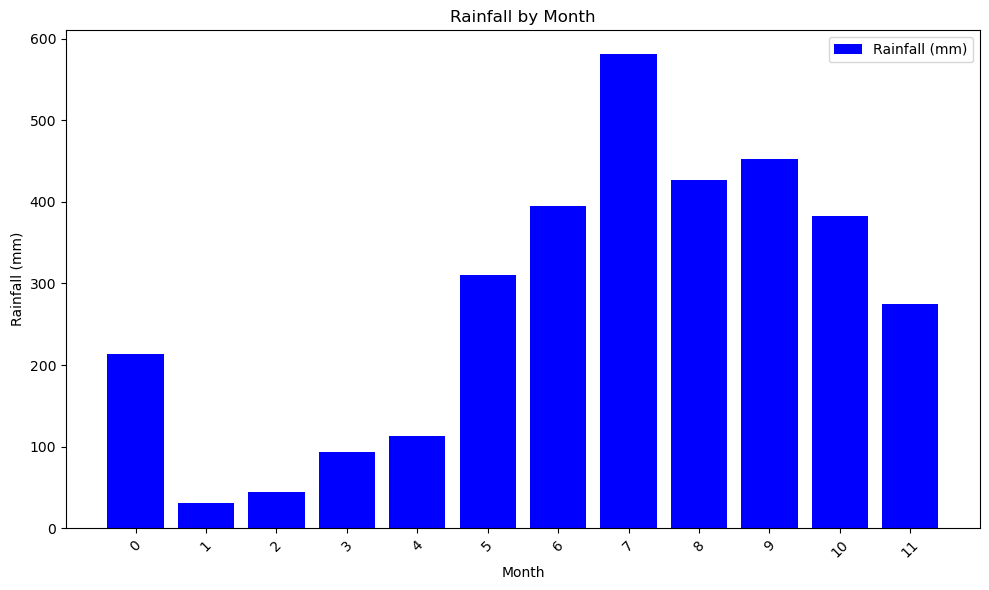

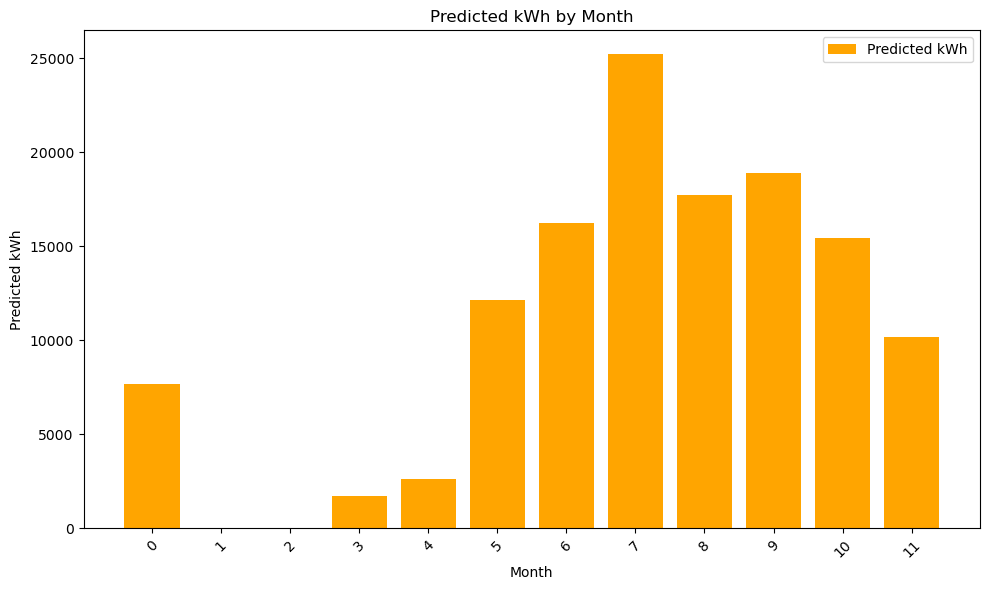

Mean Squared Error (MSE) for the testing data: 2859776.317096805
Enter the year: 2024
Enter the month: 5
Enter the rainfall (mm): 213
Predicted kWh generation: 7651.18239201412


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming predicted_df and mse are defined elsewhere

# Plotting Rainfall
months = predicted_df.index
rainfall = test_data['Rainfall']

plt.figure(figsize=(10, 6))
plt.bar(months, rainfall, color='blue', label='Rainfall (mm)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall by Month')
plt.xticks(months, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Predicted kWh
predicted_kwh = predicted_df['Predicted Generation (kWh)']

plt.figure(figsize=(10, 6))
plt.bar(months, predicted_kwh, color='orange', label='Predicted kWh')
plt.xlabel('Month')
plt.ylabel('Predicted kWh')
plt.title('Predicted kWh by Month')
plt.xticks(months, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print MSE
print("Mean Squared Error (MSE) for the testing data:", mse)

# Prediction
year = int(input("Enter the year: "))
month = input("Enter the month: ")
rainfall = float(input("Enter the rainfall (mm): "))

predicted_kwh = predict_kwh(scaler, input_weights, biases, output_weights, year, month, rainfall)
print("Predicted kWh generation:", predicted_kwh)


Predicted rainfall and kWh for each month:
    Month  Rainfall  Predicted Rainfall  Actual kWh  Predicted kWh
0       1       213          124.670513      6780.0    3362.820128
1       2        31          152.997086         0.0    4695.841317
2       3        45          181.323660         0.0    6028.862506
3       4        93          209.650233         0.0    7361.883695
4       5       113          237.976807      1410.0    8694.904883
5       6       310          266.303380     10650.0   10027.926072
6       7       395          294.629953     18240.0   11360.947261
7       8       581          322.956527     22410.0   12693.968450
8       9       427          351.283100     19230.0   14026.989639
9      10       453          379.609674     20400.0   15360.010828
10     11       382          407.936247     17400.0   16693.032016
11     12       275          436.262821      7620.0   18026.053205
Mean Squared Error (MSE) for the testing data: 20037392.8196622
Enter the year: 2025
E

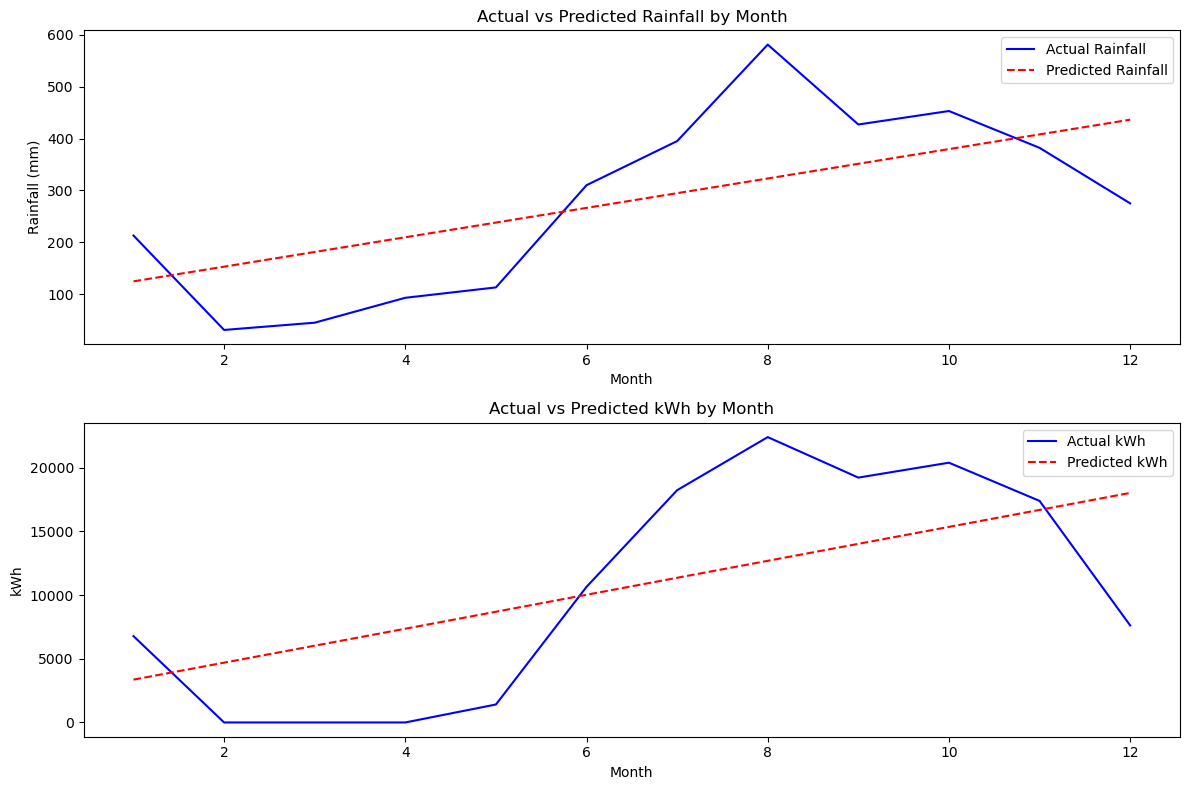

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# WEIGHT INITIALIZATION
def initialize_weights(input_size, hidden_size):
    input_weights = np.random.rand(input_size, hidden_size)
    biases = np.random.rand(hidden_size)
    return input_weights, biases

def compute_output_weights(input_weights, biases, input_data, output_data):
    hidden_layer_output = np.dot(input_data, input_weights) + biases
    output_weights = np.dot(np.linalg.pinv(hidden_layer_output), output_data)
    return output_weights

# TRAINING THE ELM MODEL
def train_elm_model(train_data_file, hidden_size=10):
    train_data = pd.read_csv(train_data_file)

    X_train = train_data[['Year', 'month']]  # Selecting input features (Year and month)
    y_train = train_data[['Rainfall', 'kwh']]  # Target variables (Rainfall and kWh)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    input_weights, biases = initialize_weights(X_train_scaled.shape[1], hidden_size)
    output_weights = compute_output_weights(input_weights, biases, X_train_scaled, y_train)

    return scaler, input_weights, biases, output_weights

# TESTING THE MODEL
def test_elm_model(test_data_file, scaler, input_weights, biases, output_weights):
    test_data = pd.read_csv(test_data_file)

    X_test = test_data[['Year', 'month']]
    X_test_scaled = scaler.transform(X_test)
    predicted_values = np.dot(X_test_scaled, input_weights) + biases
    predicted_values = np.dot(predicted_values, output_weights)
    # Replace negative values with 0
    predicted_values = np.where(predicted_values < 0, 0, predicted_values)

    # Get the actual values for the testing data
    actual_values = test_data[['Rainfall', 'kwh']]

    mse = mean_squared_error(actual_values, predicted_values)
    months = test_data['month']
    predicted_df = pd.DataFrame({'Month': months, 'Rainfall': actual_values['Rainfall'], 
                                 'Predicted Rainfall': predicted_values[:, 0],
                                 'Actual kWh': actual_values['kwh'],
                                 'Predicted kWh': predicted_values[:, 1]})

    return predicted_df, mse

# Prediction function
def predict_rainfall_kwh(scaler, input_weights, biases, output_weights, year, month):
    user_input = pd.DataFrame({'Year': [year], 'month': [month]})

    user_input_scaled = scaler.transform(user_input)

    predicted_values = np.dot(user_input_scaled, input_weights) + biases
    predicted_values = np.dot(predicted_values, output_weights)
    # Replace negative values with 0
    predicted_values = np.where(predicted_values < 0, 0, predicted_values)

    return predicted_values[0]

# Train the model
scaler, input_weights, biases, output_weights = train_elm_model("rain1.csv")

# Test the trained model with the testing data
predicted_df, mse = test_elm_model("rain.csv", scaler, input_weights, biases, output_weights)

print("Predicted rainfall and kWh for each month:")
print(predicted_df)
print("Mean Squared Error (MSE) for the testing data:", mse)

# Prediction
year = int(input("Enter the year: "))
month = input("Enter the month: ")

predicted_rainfall, predicted_kwh = predict_rainfall_kwh(scaler, input_weights, biases, output_weights, year, month)
print("Predicted rainfall (mm):", predicted_rainfall)
print("Predicted kWh generation:", predicted_kwh)

# Plotting
months = predicted_df['Month']
actual_rainfall = predicted_df['Rainfall']
predicted_rainfall = predicted_df['Predicted Rainfall']
actual_kwh = predicted_df['Actual kWh']
predicted_kwh = predicted_df['Predicted kWh']

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(months, actual_rainfall, 'b-', label='Actual Rainfall')
plt.plot(months, predicted_rainfall, 'r--', label='Predicted Rainfall')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.title('Actual vs Predicted Rainfall by Month')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(months, actual_kwh, 'b-', label='Actual kWh')
plt.plot(months, predicted_kwh, 'r--', label='Predicted kWh')
plt.xlabel('Month')
plt.ylabel('kWh')
plt.title('Actual vs Predicted kWh by Month')
plt.legend()

plt.tight_layout()
plt.show()


In [42]:
def calculate_power_generated(rainfall, catchment_area=100, height=25, efficiency=0.8, duration_hours=1):
    # Constants
    rho_water = 1000  # Density of water in kg/m^3
    g = 9.81  # Acceleration due to gravity in m/s^2
    tau = 1000  # Conversion factor to kW (1 W = 1000 kW)

    # Convert rainfall from mm to meters
    rainfall_m = rainfall / 1000

    # Calculate flow rate (m^3/s)
    flow_rate = catchment_area * rainfall_m

    # Calculate power generated (kW)
    power_generated_kw = (rho_water * g * flow_rate * height * efficiency) / tau

    # Convert power generated to kWh
    power_generated_kwh = power_generated_kw * duration_hours

    return power_generated_kwh

# Example usage
rainfall = 213  # Rainfall in mm
power_generated = calculate_power_generated(rainfall)
print("Power generated:", power_generated, "kWh")


Power generated: 4179.06 kWh
